## Portfolio Optimization

Portfolio optimization is the process of selecting the optimal combination of assets to achieve a desired risk-return profile. We will explore how to use the SciPy library in Python to perform portfolio optimization.

Before we dive into the specifics of using SciPy, let's first define some important terms related to portfolio optimization:

- Return: The gain or loss on an investment, expressed as a percentage of the initial investment.
- Risk: The likelihood that an investment's actual return will differ from its expected return.
- Covariance: The measure of how two assets move in relation to each other.
- Correlation: A statistical measure that indicates the extent to which two or more variables are related.
Now, let's move on to how to use SciPy for portfolio optimization.

First, we need to import the necessary libraries. We will use the following libraries:

In [72]:
import numpy as np
import scipy.optimize as sco
import pandas as pd
import warnings
warnings.simplefilter('ignore')

Next, we need to obtain our asset data. We will use a sample dataset of three stocks over seven periods.


In [73]:
df = pd.read_excel("Stock Price Data (1).xlsx",sheet_name = 'Sheet2')
print(df.columns)
headings = [df.columns[i] for i in range(1,len(df.columns),2)]
print(headings)

Index(['Unnamed: 0', 'JSE:NPN', 'Unnamed: 2', 'JSE:SBK', 'Unnamed: 4',
       'JSE:SHP', 'Unnamed: 6', 'JSE:APN', 'Unnamed: 8', 'JSE:SOL',
       'Unnamed: 10', 'JSE:MTN', 'Unnamed: 12', 'JSE:BVT', 'Unnamed: 14',
       'JSE:AGL', 'Unnamed: 16', 'NASDAQ:AAPL', 'Unnamed: 18', 'NYSE:PG'],
      dtype='object')
['JSE:NPN', 'JSE:SBK', 'JSE:SHP', 'JSE:APN', 'JSE:SOL', 'JSE:MTN', 'JSE:BVT', 'JSE:AGL', 'NASDAQ:AAPL', 'NYSE:PG']


In [74]:
new_dataframes = []
num_columns = len(df.columns)

for i in range(0, num_columns, 2):
    # Select two columns using iloc (integer-location based indexing)
    # Ensure that the slice doesn't go out of bounds if there's an odd number of columns
    if i + 2 <= num_columns:
        new_df = df.iloc[1:, i:i+2].copy()
        new_dataframes.append(new_df)
    else:
        # Handle the case of an odd number of columns (last single column)
        new_df = df.iloc[:, i:i+1].copy()
        new_dataframes.append(new_df)

In [75]:
merged_df = new_dataframes[0].set_index('Unnamed: 0')
merged_df.index.name = None
for i in range(1, len(new_dataframes)):
    merged_df = pd.merge(merged_df, new_dataframes[i].set_index('Unnamed: '+ str(i*2)), left_index=True, right_index=True, how='left').dropna()
merged_df

,JSE:NPN,JSE:SBK,JSE:SHP,JSE:APN,JSE:SOL,JSE:MTN,JSE:BVT,JSE:AGL,NASDAQ:AAPL,NYSE:PG
2014-01-02 17:00:00,107236.48,13031,16550,27305,51704,21714,27074,22275.81,209.1841,853.047464
2014-01-03 17:00:00,105178,12853,16351,27353,51611,21525,26701,22080.52,205.077936,853.96066
2014-01-06 17:00:00,104945.3,12630,16199,26801,51610,21145,26550,21988.27,207.755275,862.2432
2014-01-07 17:00:00,104717.44,12886,16173,27089,52105,21447,26811,21824.38,205.745211,868.417578
2014-01-08 17:00:00,105543.54,12792,15897,26961,51768,21224,26548,21902.89,207.042588,855.904032
...,...,...,...,...,...,...,...,...,...,...
2025-08-12 17:00:00,561633,23643,27050,11342,9418,17200,23903,51615,4065.516915,2745.573779
2025-08-13 17:00:00,585466,24202,27128,11635,9790,17212,24029,51329,4090.648228,2724.585956
2025-08-14 17:00:00,580976,24911,26959,11201,9820,17268,23573,50729,4087.15124,2699.36692
2025-08-15 17:00:00,583030,25040,26858,11245,9953,17178,23766,51565,4062.55178,2707.78312


We can plot the price movement using the `lineplot` function from the `seaborn` library as follows:

<Axes: >

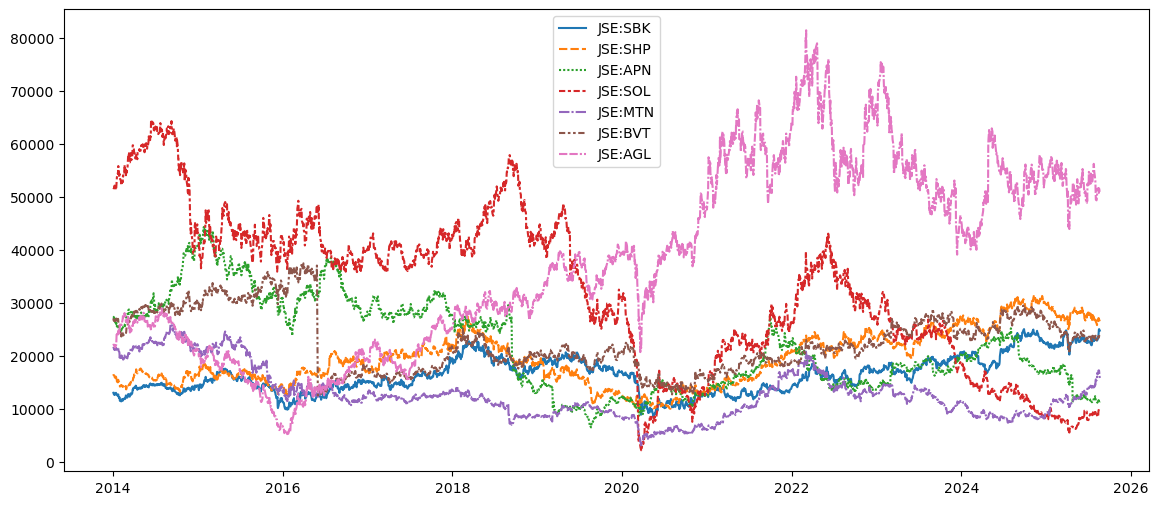

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

sns.lineplot(data=merged_df.drop(["JSE:NPN",'NASDAQ:AAPL',"NYSE:PG"],axis=1))

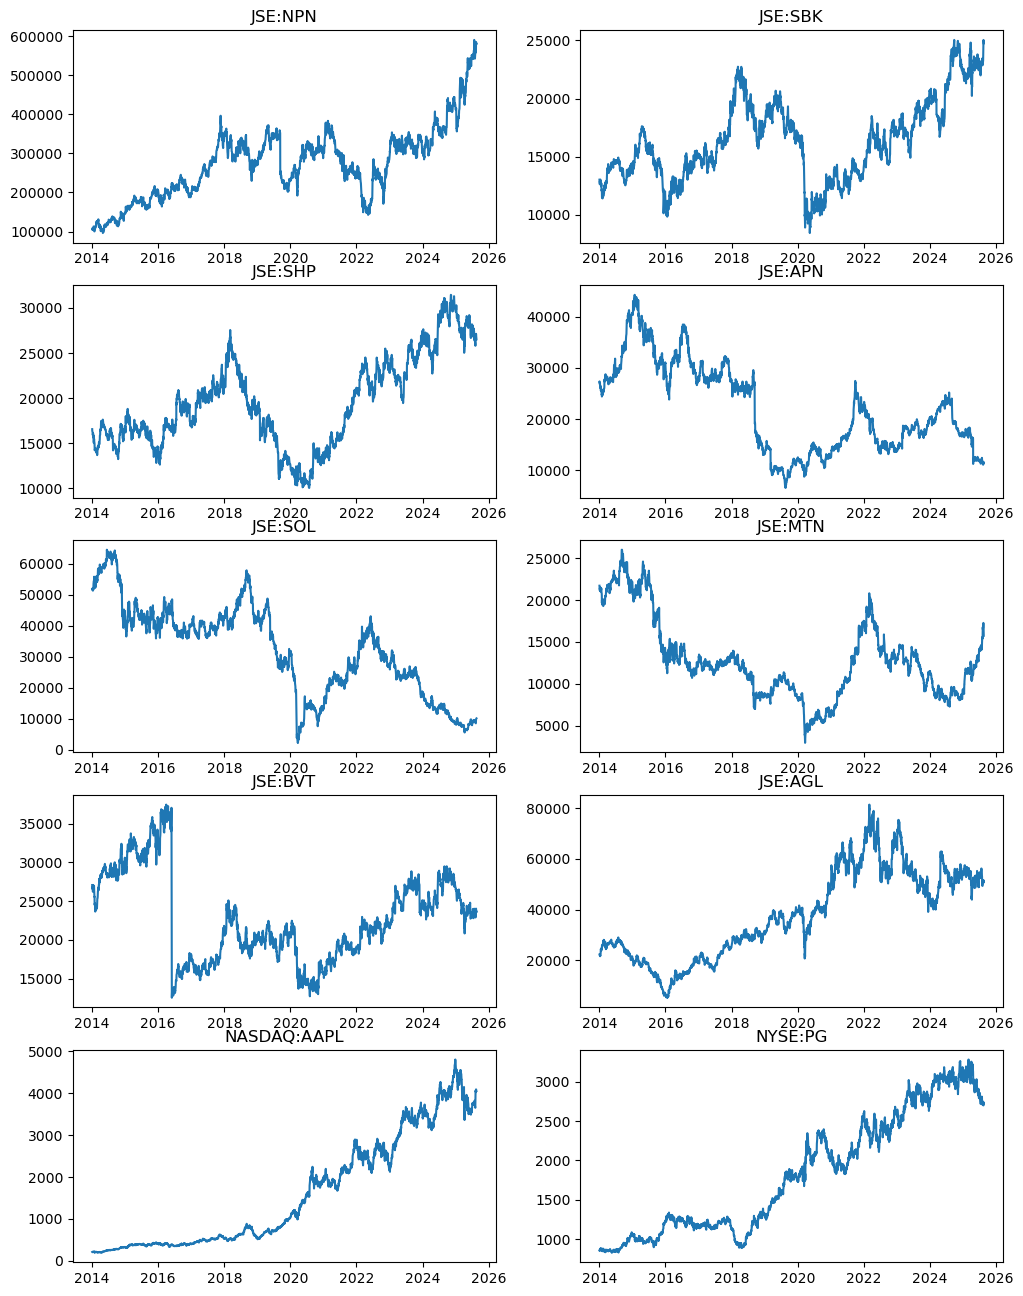

In [77]:
fig, axs = plt.subplots(5,2,figsize=(12,16))
for i in range(5):
    for j in range(2):
        axs[i,j].set_title(merged_df.columns[i*2+j])
        axs[i,j].plot(merged_df.reset_index()['index'], merged_df.iloc[:,i*2+j])

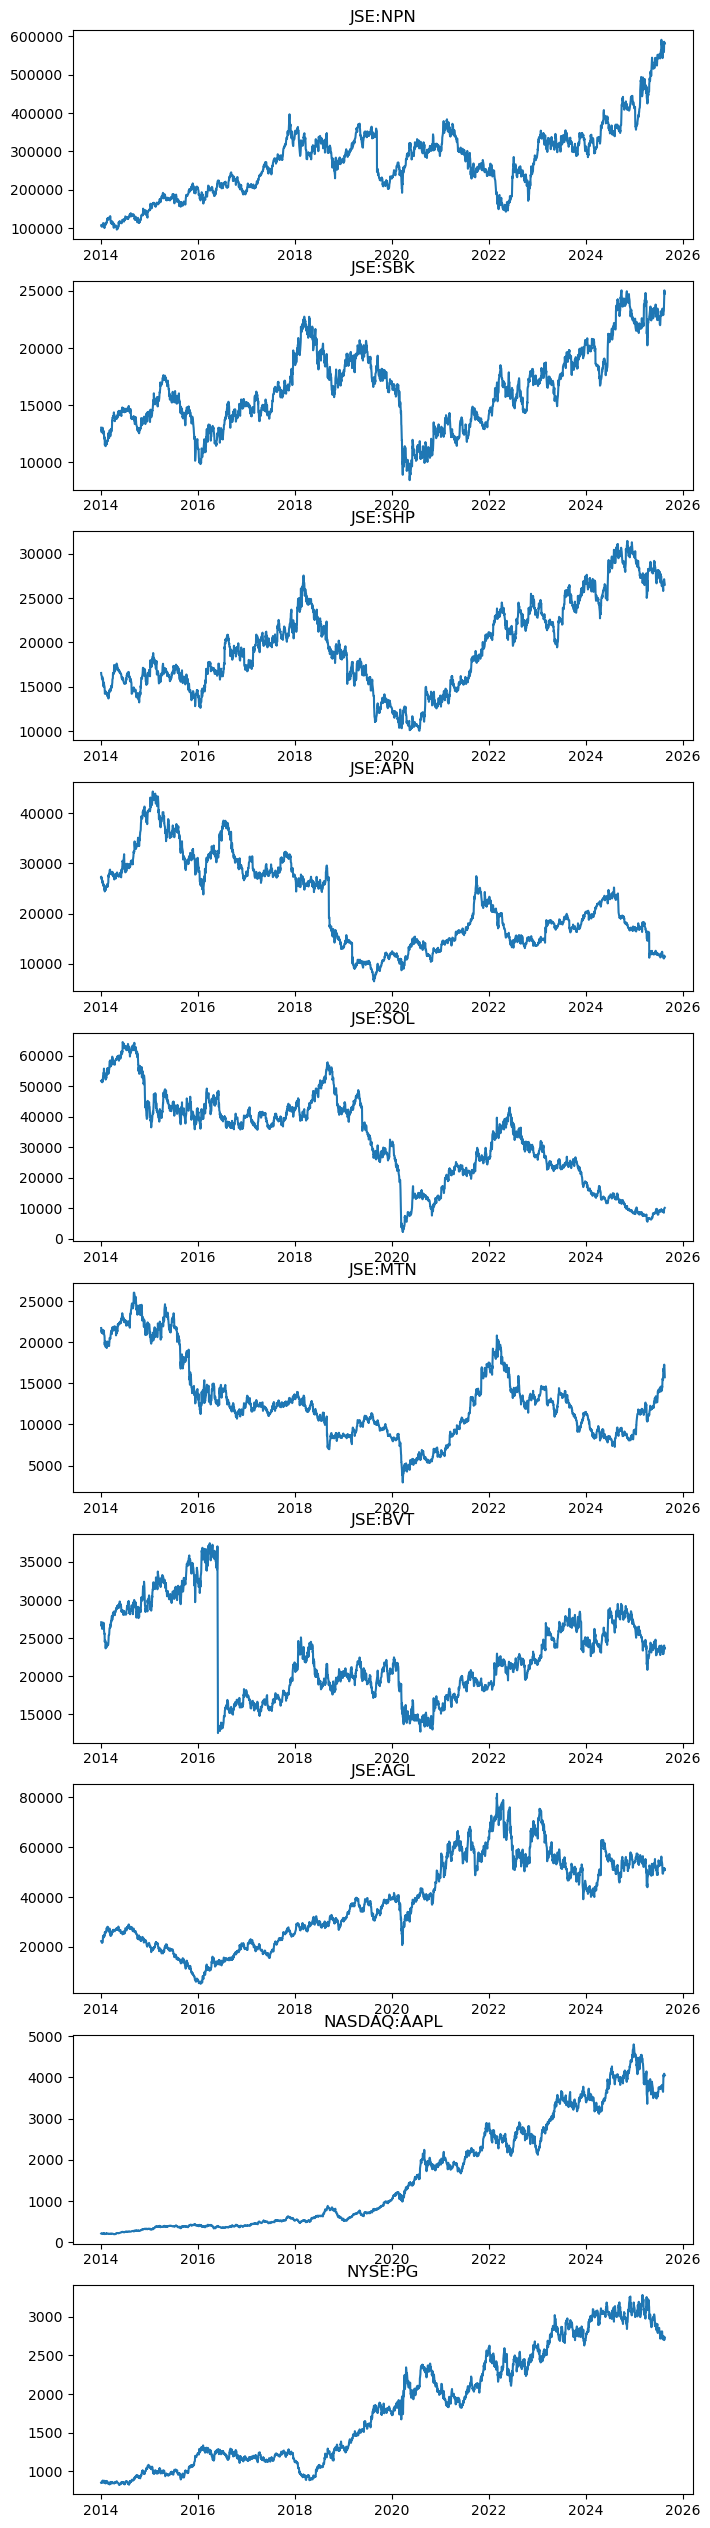

In [78]:
fig, axs = plt.subplots(10,1,figsize=(8,32))
for i in range(10):
    axs[i].set_title(merged_df.columns[i])
    axs[i].plot(merged_df.reset_index()['index'], merged_df.iloc[:,i])
        


The `returns` can be calculated by subtracting the current price from the previous price using the `shift` function.  Remember to remove `NaN` values which occur from trying to subtract the initial price from a previous price which does not exist.  The leaves six return periods.

In [79]:
data =merged_df
returns = data/data.shift(1)-1
returns = returns.dropna()
returns#i think this is the daily returns

,JSE:NPN,JSE:SBK,JSE:SHP,JSE:APN,JSE:SOL,JSE:MTN,JSE:BVT,JSE:AGL,NASDAQ:AAPL,NYSE:PG
2014-01-03 17:00:00,-0.019196,-0.01366,-0.012024,0.001758,-0.001799,-0.008704,-0.013777,-0.008767,-0.019629,0.001071
2014-01-06 17:00:00,-0.002212,-0.01735,-0.009296,-0.020181,-0.000019,-0.017654,-0.005655,-0.004178,0.013055,0.009699
2014-01-07 17:00:00,-0.002171,0.020269,-0.001605,0.010746,0.009591,0.014282,0.009831,-0.007454,-0.009675,0.007161
2014-01-08 17:00:00,0.007889,-0.007295,-0.017065,-0.004725,-0.006468,-0.010398,-0.009809,0.003597,0.006306,-0.01441
2014-01-09 17:00:00,-0.015516,-0.007583,0.000189,-0.017099,-0.008074,-0.004853,-0.006064,-0.012052,-0.000331,0.014984
...,...,...,...,...,...,...,...,...,...,...
2025-08-12 17:00:00,0.005705,0.016903,0.018641,0.027727,0.110875,0.030928,0.031013,0.006906,0.01029,0.000134
2025-08-13 17:00:00,0.042435,0.023643,0.002884,0.025833,0.039499,0.000698,0.005271,-0.005541,0.006182,-0.007644
2025-08-14 17:00:00,-0.007669,0.029295,-0.00623,-0.037301,0.003064,0.003254,-0.018977,-0.011689,-0.000855,-0.009256
2025-08-15 17:00:00,0.003535,0.005178,-0.003746,0.003928,0.013544,-0.005212,0.008187,0.01648,-0.006019,0.003118


We can plot the returns using the `lineplot` function from the `seaborn` library as follows:

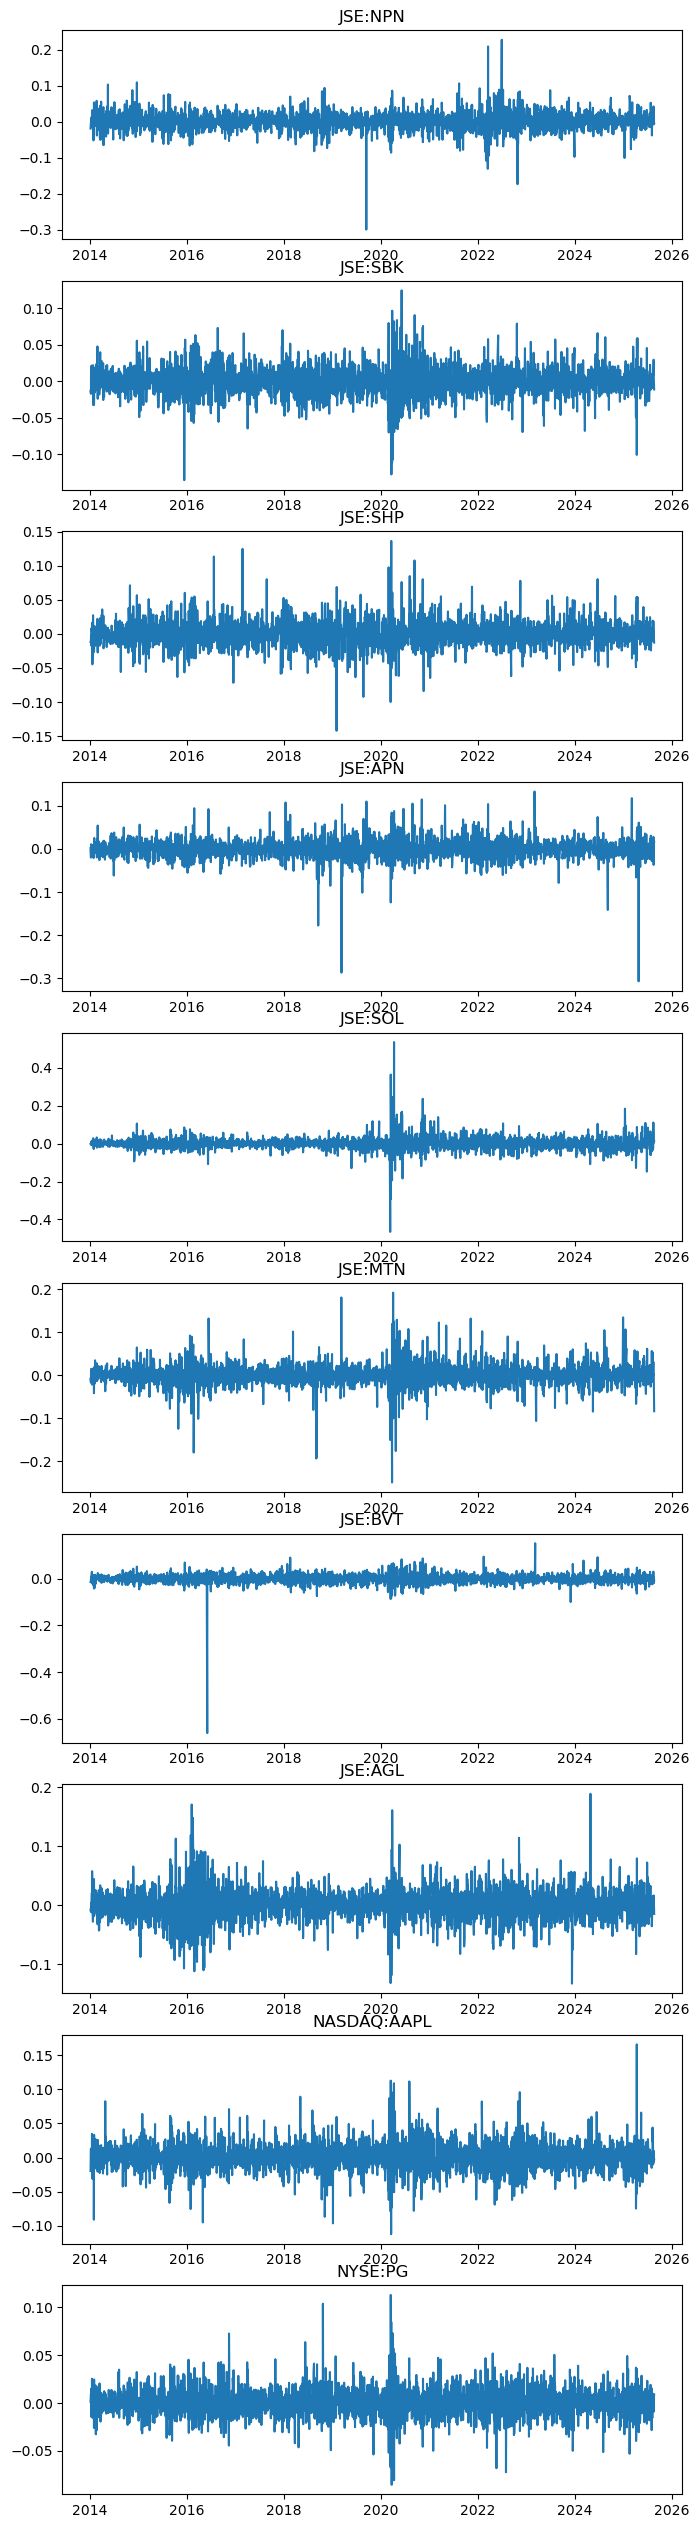

In [80]:
fig, axs = plt.subplots(10,1,figsize=(8,32))
for i in range(10):
    axs[i].set_title(returns.columns[i])
    axs[i].plot(returns.reset_index()['index'], returns.iloc[:,i])

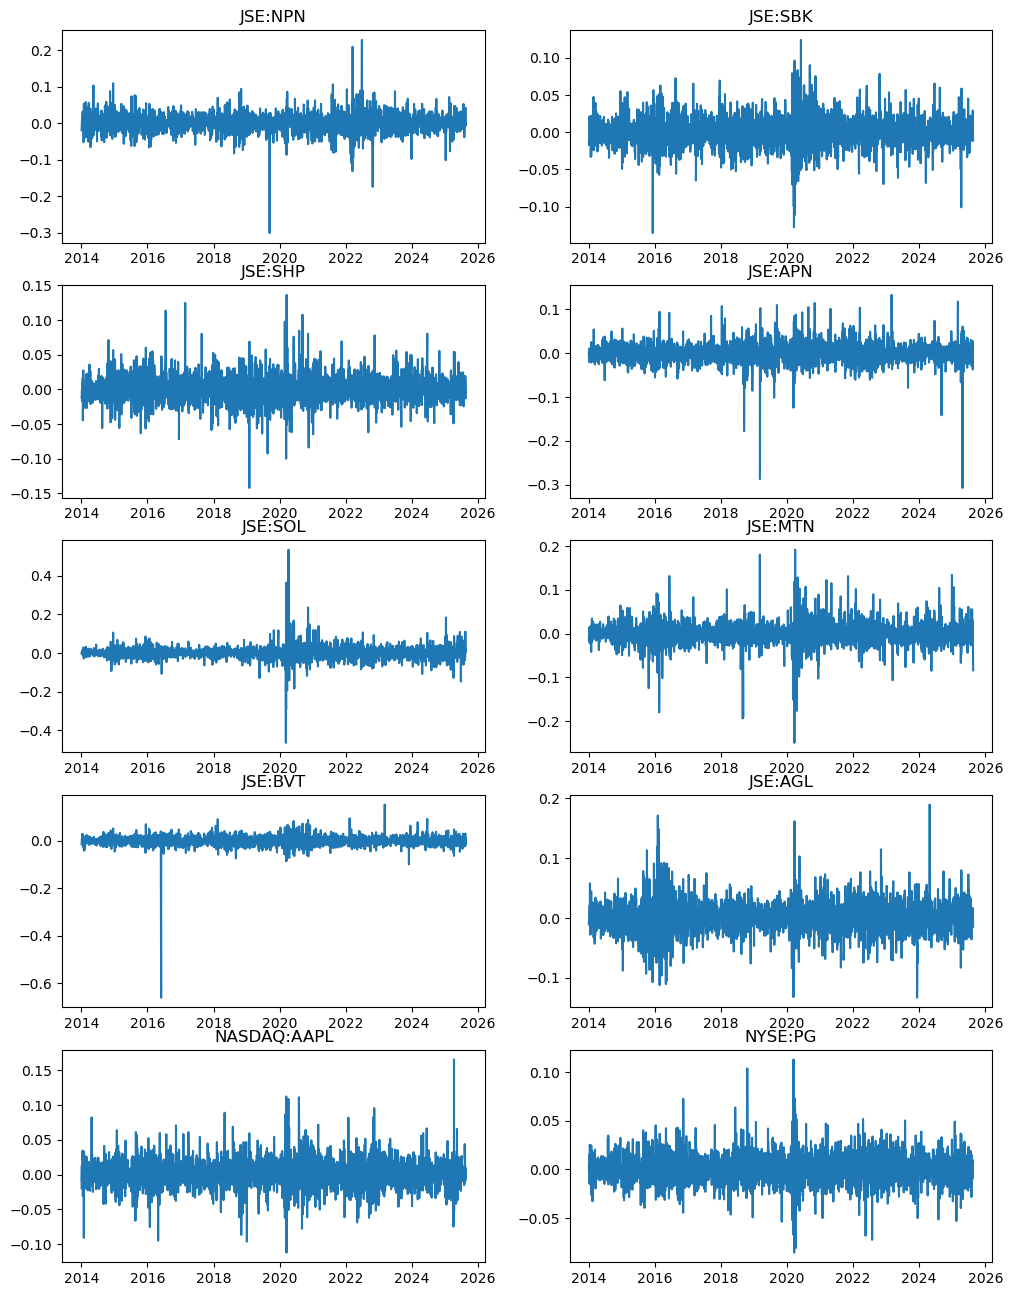

In [81]:
fig, axs = plt.subplots(5,2,figsize=(12,16))
for i in range(5):
    for j in range(2):
        axs[i,j].set_title(returns.columns[i*2+j])
        axs[i,j].plot(returns.reset_index()['index'], returns.iloc[:,i*2+j])

<Axes: >

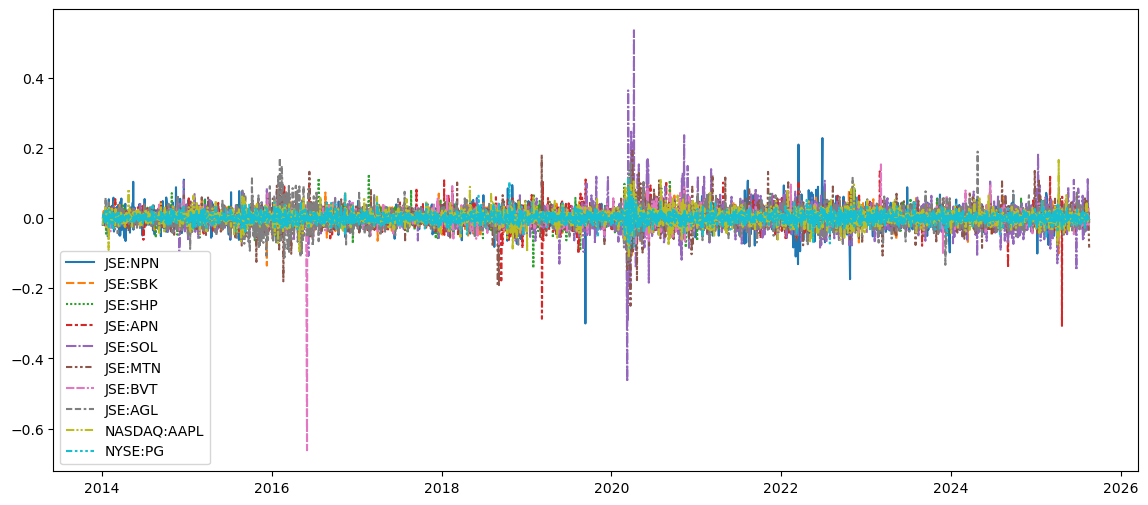

In [82]:
plt.figure(figsize=(14,6))

sns.lineplot(data=returns)


`Stock A` has the highest return from period 3 to period 4 but also the highest drop in price from period 4 to period 5.

We can calculate the average returns using the `mean` function.

In [83]:
mean_returns = returns.mean()
mean_returns

JSE:NPN         0.00092
JSE:SBK        0.000425
JSE:SHP        0.000351
JSE:APN       -0.000037
JSE:SOL        0.000033
JSE:MTN        0.000228
JSE:BVT        0.000269
JSE:AGL         0.00065
NASDAQ:AAPL    0.001264
NYSE:PG        0.000528
dtype: object

In terms of the average returns, `Stock A` performs the best and `Stock B` performs the worst.

We can visualise this by deriving a bar chart using the `barplot` function from the `seaborn` library.

<Axes: xlabel='None', ylabel='None'>

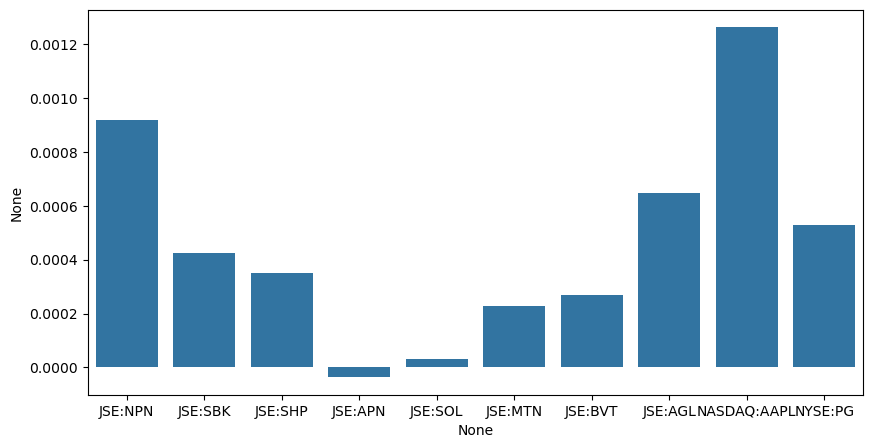

In [84]:
plt.figure(figsize=(10,5))

sns.barplot(x=mean_returns.index, y=mean_returns)

According to Markowitz, return is not the only metric that should be considered when selecting a portfolio of assets.  These returns are not guaranteed due to volatility in price movement.  Hence we can calculate the standard deviation using the `std` function and plot the volatility on a bar chart.  

In [85]:
st_dev = returns.std()
st_dev

JSE:NPN        0.025093
JSE:SBK        0.019776
JSE:SHP        0.019146
JSE:APN        0.023062
JSE:SOL        0.034996
JSE:MTN        0.026073
JSE:BVT        0.022195
JSE:AGL        0.026704
NASDAQ:AAPL    0.020315
NYSE:PG        0.015014
dtype: object

<Axes: xlabel='None', ylabel='None'>

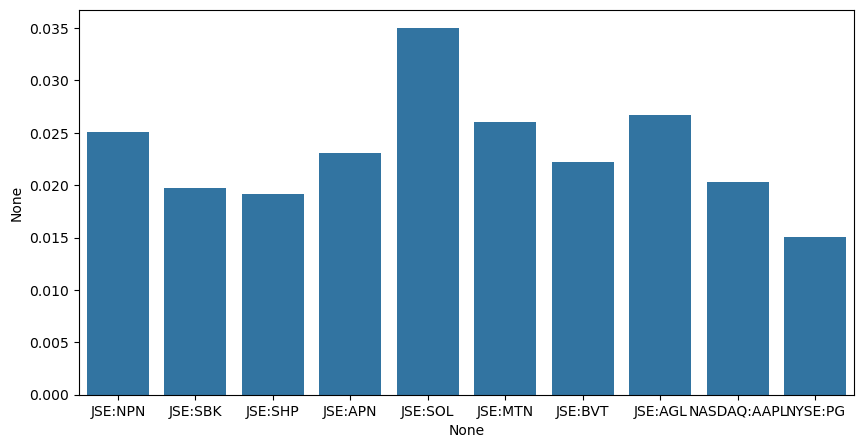

In [86]:
plt.figure(figsize=(10,5))

sns.barplot(x=st_dev.index, y=st_dev)

The graph above indicates that higher volatilites are rewarded with higher returns.  To determine which stock has a higher reward for a given level of volatility, we can calculate the Sharpe Ratio which determines which the return per unit of risk

In [87]:
var = st_dev**2
var

JSE:NPN         0.00063
JSE:SBK        0.000391
JSE:SHP        0.000367
JSE:APN        0.000532
JSE:SOL        0.001225
JSE:MTN         0.00068
JSE:BVT        0.000493
JSE:AGL        0.000713
NASDAQ:AAPL    0.000413
NYSE:PG        0.000225
dtype: object

In [88]:
sharpe_ratio = mean_returns/st_dev
sharpe_ratio

JSE:NPN        0.036679
JSE:SBK        0.021485
JSE:SHP        0.018318
JSE:APN       -0.001588
JSE:SOL        0.000932
JSE:MTN        0.008761
JSE:BVT        0.012129
JSE:AGL        0.024323
NASDAQ:AAPL    0.062204
NYSE:PG        0.035154
dtype: object

<Axes: xlabel='None', ylabel='None'>

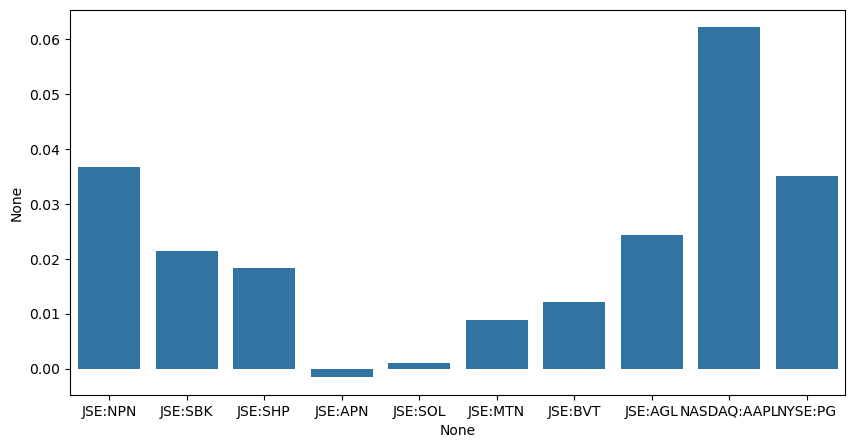

In [89]:
plt.figure(figsize=(10,5))

sns.barplot(x=sharpe_ratio.index, y=sharpe_ratio)

The above graphic shows that `Stock C` is the best performing stock according to the Sharpe Ratio, even though `Stock A` produces the highest return on average.

However, even though the graphics are a good indicator of how the portfolio should be constructed, they do not account for portfolio diversification.  Hence we need to calculate the variance-covariance matrix using the `cov` function which will be used to calculate portfolio volatility.  Portfolio volatility is used as the objective function for the minimum variance portfolio and accounts for the denominator of the objective function for the maximum Sharpe Ratio portfolio.

In [90]:
cov_matrix=((returns-mean_returns).T@(returns-mean_returns))/(len(returns)-1)
cov_matrix

,JSE:NPN,JSE:SBK,JSE:SHP,JSE:APN,JSE:SOL,JSE:MTN,JSE:BVT,JSE:AGL,NASDAQ:AAPL,NYSE:PG
JSE:NPN,0.00063,0.000106,0.00007,0.000098,0.000124,0.000104,0.000077,0.000159,0.000059,-0.000019
JSE:SBK,0.000106,0.000391,0.000175,0.000121,0.00022,0.000226,0.000208,0.000144,-0.000011,-0.00004
JSE:SHP,0.00007,0.000175,0.000367,0.000109,0.000108,0.000144,0.000159,0.000079,0.000004,-0.000008
JSE:APN,0.000098,0.000121,0.000109,0.000532,0.000123,0.000134,0.00012,0.0001,-0.000004,-0.00002
JSE:SOL,0.000124,0.00022,0.000108,0.000123,0.001225,0.000297,0.000157,0.000364,0.000067,0.000004
JSE:MTN,0.000104,0.000226,0.000144,0.000134,0.000297,0.00068,0.000171,0.000179,0.000016,-0.000016
JSE:BVT,0.000077,0.000208,0.000159,0.00012,0.000157,0.000171,0.000493,0.000095,-0.000002,-0.000031
JSE:AGL,0.000159,0.000144,0.000079,0.0001,0.000364,0.000179,0.000095,0.000713,0.000044,-0.00001
NASDAQ:AAPL,0.000059,-0.000011,0.000004,-0.000004,0.000067,0.000016,-0.000002,0.000044,0.000413,0.000158
NYSE:PG,-0.000019,-0.00004,-0.000008,-0.00002,0.000004,-0.000016,-0.000031,-0.00001,0.000158,0.000225


Using `seaborn` to produce a heatmap using the `heatmap` function, we can see that the all the stocks have negative covariance with each other.  Along the principal diagonal, we can see the variance of each stock (covariance with itself).  `Stock A` is the most volatile.

In [91]:
portfolio_returns = [np.sum(np.array([0.1 for i in range(10)])*mean_returns)]
portfolio_weights = {'Equally Weighted':[0.1 for i in range(10)]}
portfolio_variance = [(np.array([0.1 for i in range(10)])@cov_matrix)@(np.array([0.1 for i in range(10)])).T]

In [92]:
portfolio_returns


[0.00046306202305196483]

In [93]:
portfolio_weights

{'Equally Weighted': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}

In [94]:
portfolio_variance

[0.00014398129086071456]

## Maximum Sharpe Ratio

The maximum Sharpe Ratio portfolio maximizes the portfolio Sharpe Ratio by adjusting the weights of each stock within the portfolio.  Since `scipy.optimize` does not have a maxmization function, we need to multiply the objective function by negative 1 such that minimization of this new function is actually maximizing the original function.  We can create the objective function by creating a python function

In [95]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights)#is this the return
    portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
    portfolio_std_dev = np.sqrt(portfolio_var)
    sharpe_ratio = portfolio_return / portfolio_std_dev
    return -sharpe_ratio

Next, we need to create the constraints using Python functions.  First constraint is that the weights need to sum up to 1 and the second constraint indicates that there is no shorting of assets i.e. each asset needs to have a non-negative weight.

In [96]:
def weight_constraint(weights):
    return np.sum(weights) - 1

def individual_weight_constraint(weights):
    return weights

Finally, we need to combine the constraints into a dictionary, set the intial weights (most likely equally weighted or an arbitrary non-zero weight), indicate the bounds as a tuple for each weight (lower limit of zero and upper limit of one) and then feed these parameters into the `minimize` function using the `Sequential Least Squares Programming - SLSQP`

In [97]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})

initial_weights = np.array([1/len(data.columns) for i in range(len(data.columns))])
bounds = tuple((0, 1) for i in range(len(data.columns)))

result = sco.minimize(neg_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.07245889050872087
       x: [ 1.743e-01  1.193e-01  5.685e-02  0.000e+00  0.000e+00
            1.277e-18  1.552e-17  6.370e-02  4.523e-01  1.335e-01]
     nit: 13
     jac: [ 2.527e-04  3.200e-05 -4.783e-04  2.093e-02  4.660e-02
            1.363e-02  6.566e-04  1.730e-04 -1.017e-04  1.070e-04]
    nfev: 143
    njev: 13

In [98]:
print('The Maximum Sharpe Ratio Portfolio produces a maximum return of ', -np.round(result.fun,2))
print('With a weight vector as follows: ', np.round(result.x,2))

portfolio_returns.append(-result.fun)
portfolio_weights['Maximum Sharpe Ratio'] = result.x
portfolio_variance.append((result.x@cov_matrix)@(result.x).T)

The Maximum Sharpe Ratio Portfolio produces a maximum return of  0.07
With a weight vector as follows:  [0.17 0.12 0.06 0.   0.   0.   0.   0.06 0.45 0.13]


In [99]:
portfolio_variance

[0.00014398129086071456, 0.000159289007605047]

## Minimum Variance

The Minimum Variance portfolio minimizes portfolio variance by adjusting the weights of each stock within the portfolio.  `scipy.optimize` can be used to minimize the portfolio variance.  We can create the objective function by creating a python function which takes `weights` and `cov_matrix` as arguments.

In [100]:
def portfolio_var(weights, cov_matrix):
    portfolio_var = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_var

In [101]:
def weight_constraint(weights):
    return np.sum(weights) - 1

def individual_weight_constraint(weights):
    return weights

In [102]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})

initial_weights = np.array([1/len(data.columns) for i in range(len(data.columns))])
bounds = tuple((0, 1) for i in range(len(data.columns)))

result = sco.minimize(portfolio_var, initial_weights, args=(cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.009492610752576782
       x: [ 8.542e-02  1.025e-01  1.141e-01  9.169e-02  8.674e-19
            1.908e-02  7.529e-02  5.179e-02  4.223e-02  4.179e-01]
     nit: 17
     jac: [ 9.696e-03  9.518e-03  9.662e-03  9.496e-03  1.029e-02
            9.464e-03  9.398e-03  9.685e-03  9.472e-03  9.394e-03]
    nfev: 187
    njev: 17

In [103]:
print('The Minimum Variance Portfolio produces a minimum variance of ', np.round(result.fun,2))
print('With a weight vector as follows: ', np.round(result.x,2))

portfolio_returns.append(-result.fun)
portfolio_weights['Minimum Variance'] = result.x
portfolio_variance.append((result.x@cov_matrix)@(result.x).T)

The Minimum Variance Portfolio produces a minimum variance of  0.01
With a weight vector as follows:  [0.09 0.1  0.11 0.09 0.   0.02 0.08 0.05 0.04 0.42]


## Maximum Return

The Maximum Return portfolio maximizes portfolio return by adjusting the weights of each stock within the portfolio.  `scipy.optimize` can be used to minimize the negative of the portfolio return.  We can create the objective function by creating a python function which takes `weights` and `mean_returns` as arguments.

In [104]:
def neg_portfolio_return(weights, mean_returns):
    portfolio_return = np.sum(mean_returns * weights)
    return -portfolio_return#return on portfoliio

In [105]:
def weight_constraint(weights):
    return np.sum(weights) - 1

def individual_weight_constraint(weights):
    return weights

In [106]:
constraints = ({'type': 'eq', 'fun': weight_constraint},
               {'type': 'ineq', 'fun': individual_weight_constraint})

initial_weights = np.array([1/len(data.columns) for i in range(len(data.columns))])
bounds = tuple((0, 1) for i in range(len(data.columns)))

result = sco.minimize(neg_portfolio_return, initial_weights, args=(mean_returns), method='SLSQP', bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.0010964341696626902
       x: [ 3.140e-01  0.000e+00  0.000e+00  8.825e-17  3.496e-16
            5.443e-17  2.906e-17  9.681e-02  5.892e-01  3.469e-18]
     nit: 23
     jac: [-9.204e-04 -4.249e-04 -3.507e-04  3.661e-05 -3.262e-05
           -2.284e-04 -2.692e-04 -6.495e-04 -1.264e-03 -5.278e-04]
    nfev: 253
    njev: 23

In [107]:
print('The Maximum Return Portfolio produces a maximum return of ', -np.round(result.fun,2))
print('With a weight vector as follows: ', np.round(result.x,2))

portfolio_returns.append(-result.fun)
portfolio_weights['Maximum Return'] = result.x
portfolio_variance.append((result.x@cov_matrix)@(result.x).T)

The Maximum Return Portfolio produces a maximum return of  0.0
With a weight vector as follows:  [0.31 0.   0.   0.   0.   0.   0.   0.1  0.59 0.  ]


`sco.minimize` function takes several arguments.  `

In [108]:
portfolio_returns

[0.00046306202305196483,
 np.float64(0.07245889050872087),
 np.float64(-0.009492610752576782),
 0.0010964341696626902]

In [109]:
portfolio_variance

[0.00014398129086071456,
 0.000159289007605047,
 9.010965889993635e-05,
 0.0002487487347309123]

In [110]:
portfolio_weights

{'Equally Weighted': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
 'Maximum Sharpe Ratio': array([1.74341397e-01, 1.19276188e-01, 5.68456681e-02, 0.00000000e+00,
        0.00000000e+00, 1.27732568e-18, 1.55244199e-17, 6.37002053e-02,
        4.52313855e-01, 1.33522687e-01]),
 'Minimum Variance': array([8.54159995e-02, 1.02523949e-01, 1.14103320e-01, 9.16867676e-02,
        8.67361738e-19, 1.90818056e-02, 7.52915031e-02, 5.17888055e-02,
        4.22264993e-02, 4.17881351e-01]),
 'Maximum Return': array([3.13972093e-01, 0.00000000e+00, 0.00000000e+00, 8.82540568e-17,
        3.49587438e-16, 5.44269491e-17, 2.90566182e-17, 9.68106627e-02,
        5.89217244e-01, 3.46944695e-18])}

In [111]:
portfolio_weights = pd.DataFrame(portfolio_weights, index=merged_df.columns)
portfolio_weights

,Equally Weighted,Maximum Sharpe Ratio,Minimum Variance,Maximum Return
JSE:NPN,0.1,1.743414e-01,8.541600e-02,3.139721e-01
JSE:SBK,0.1,1.192762e-01,1.025239e-01,0.000000e+00
JSE:SHP,0.1,5.684567e-02,1.141033e-01,0.000000e+00
JSE:APN,0.1,0.000000e+00,9.168677e-02,8.825406e-17
JSE:SOL,0.1,0.000000e+00,8.673617e-19,3.495874e-16
JSE:MTN,0.1,1.277326e-18,1.908181e-02,5.442695e-17
JSE:BVT,0.1,1.552442e-17,7.529150e-02,2.905662e-17
JSE:AGL,0.1,6.370021e-02,5.178881e-02,9.681066e-02
NASDAQ:AAPL,0.1,4.523139e-01,4.222650e-02,5.892172e-01
NYSE:PG,0.1,1.335227e-01,4.178814e-01,3.469447e-18


Text(0, 0.5, 'Returns')

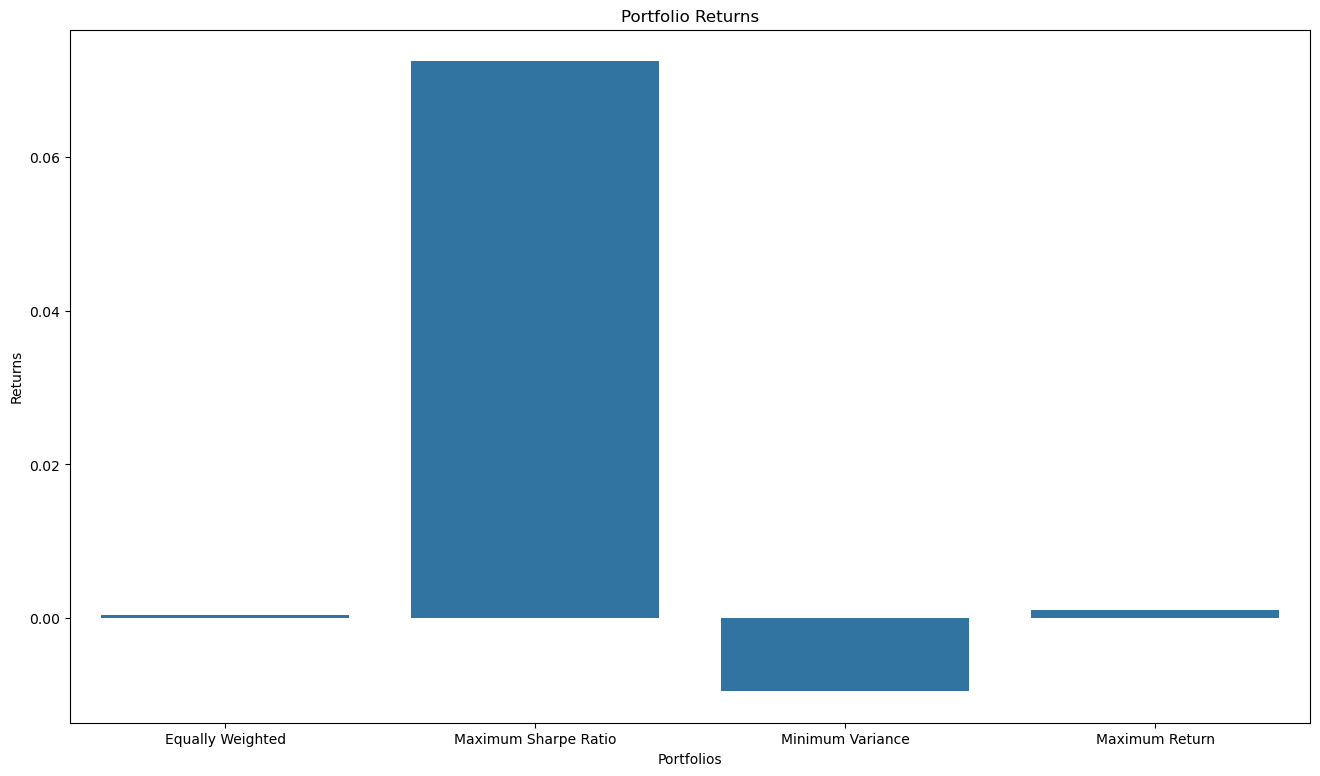

In [112]:
plt.figure(figsize=(16,9))
plt.title('Portfolio Returns')
ax = sns.barplot(x=portfolio_weights.columns, y=portfolio_returns)
ax.set_xlabel("Portfolios")
ax.set_ylabel("Returns")

# Sharpe Ratio
Most widely used performance metric which involves assessing the returns generated for each unti of risk taken.

$S = \frac{R_p}{\sigma_p}$

Where:
- $R_p$ is the return of the portfolio
- $\sigma_p$ is the portfolio variance

A higher Sharpe Ratio indicates better performance for the amount of total risk taken.



Text(0, 0.5, 'Sharpe Ratio')

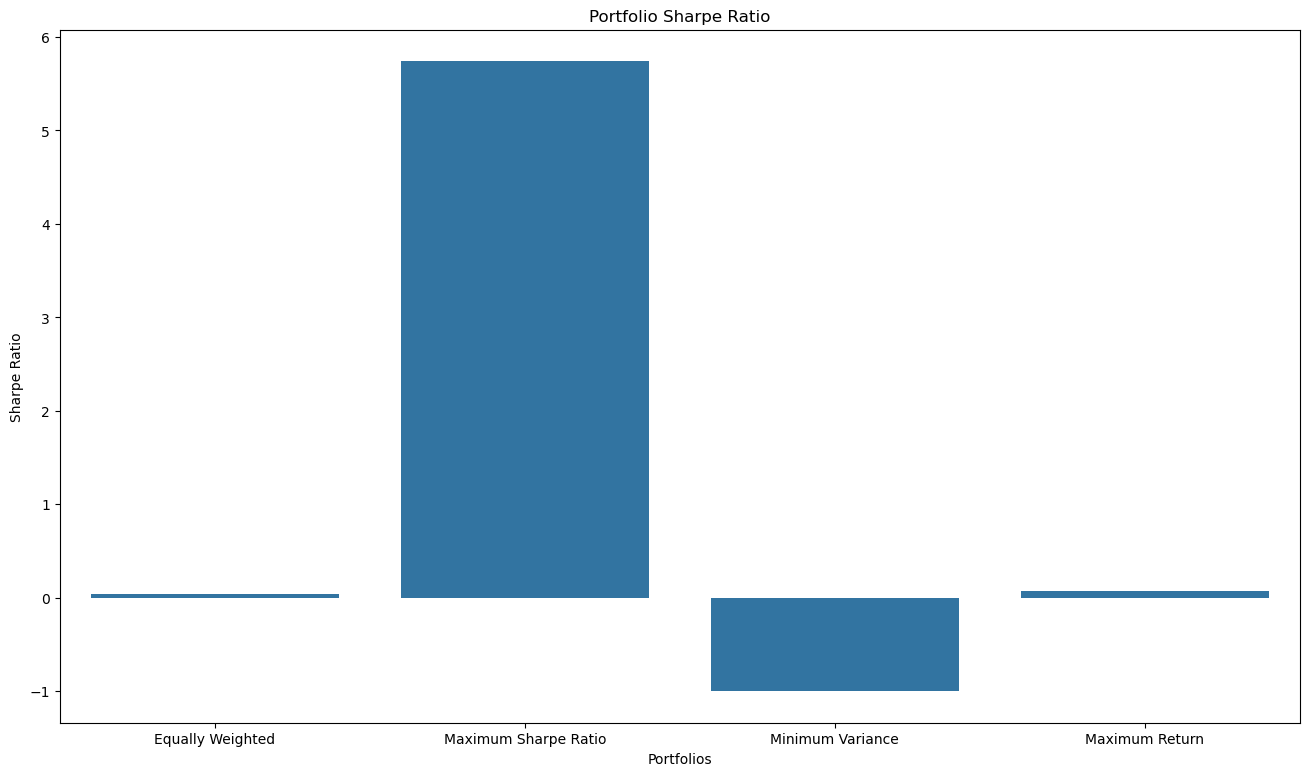

In [113]:
plt.figure(figsize=(16,9))
portfolio_sharpe_ratio = np.array(portfolio_returns)/(np.sqrt(portfolio_variance))
plt.title('Portfolio Sharpe Ratio')
ax = sns.barplot(x=portfolio_weights.columns, y=portfolio_sharpe_ratio)
ax.set_xlabel("Portfolios")
ax.set_ylabel("Sharpe Ratio")

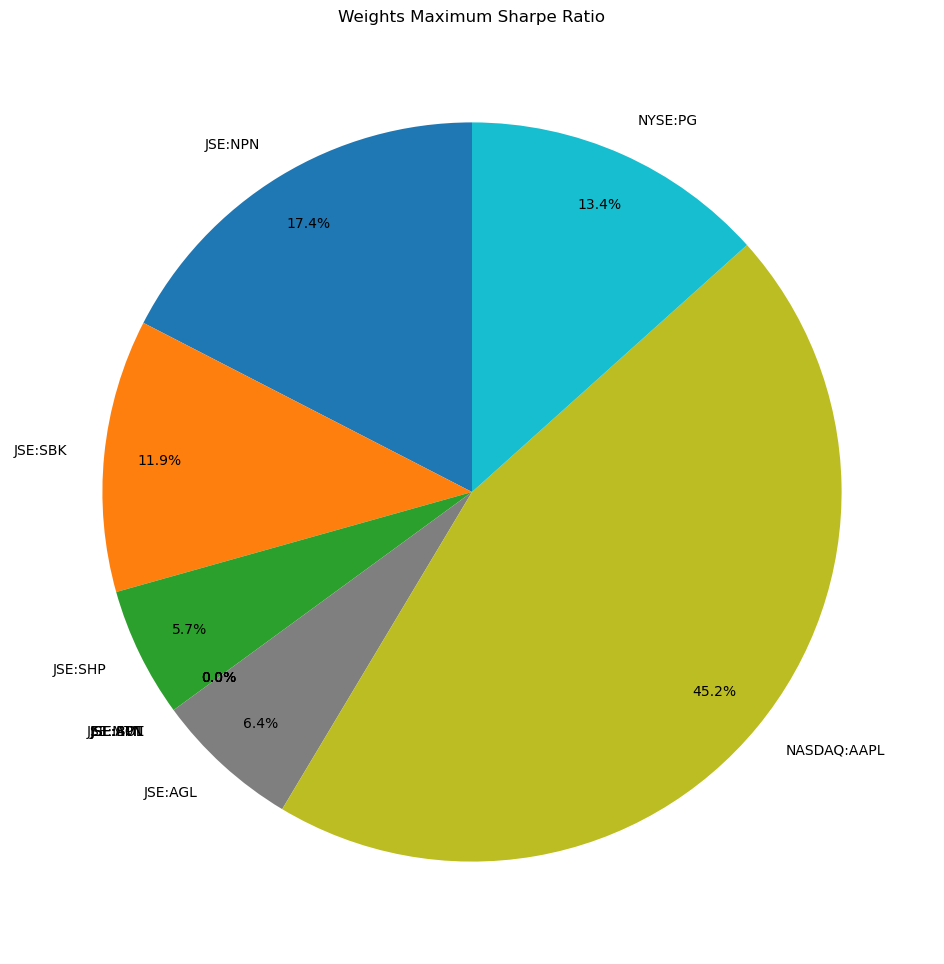

In [114]:
plt.figure(figsize=(12,12))
plt.title('Weights Maximum Sharpe Ratio')
percentage_threshold = 1
plt.pie(portfolio_weights['Maximum Sharpe Ratio'],labels=portfolio_weights.reset_index()['index'],autopct='%1.1f%%',
                                  startangle=90, pctdistance=0.85)
plt.show()
plt.savefig('Weights Maximum Sharpe Ratio.jpg')

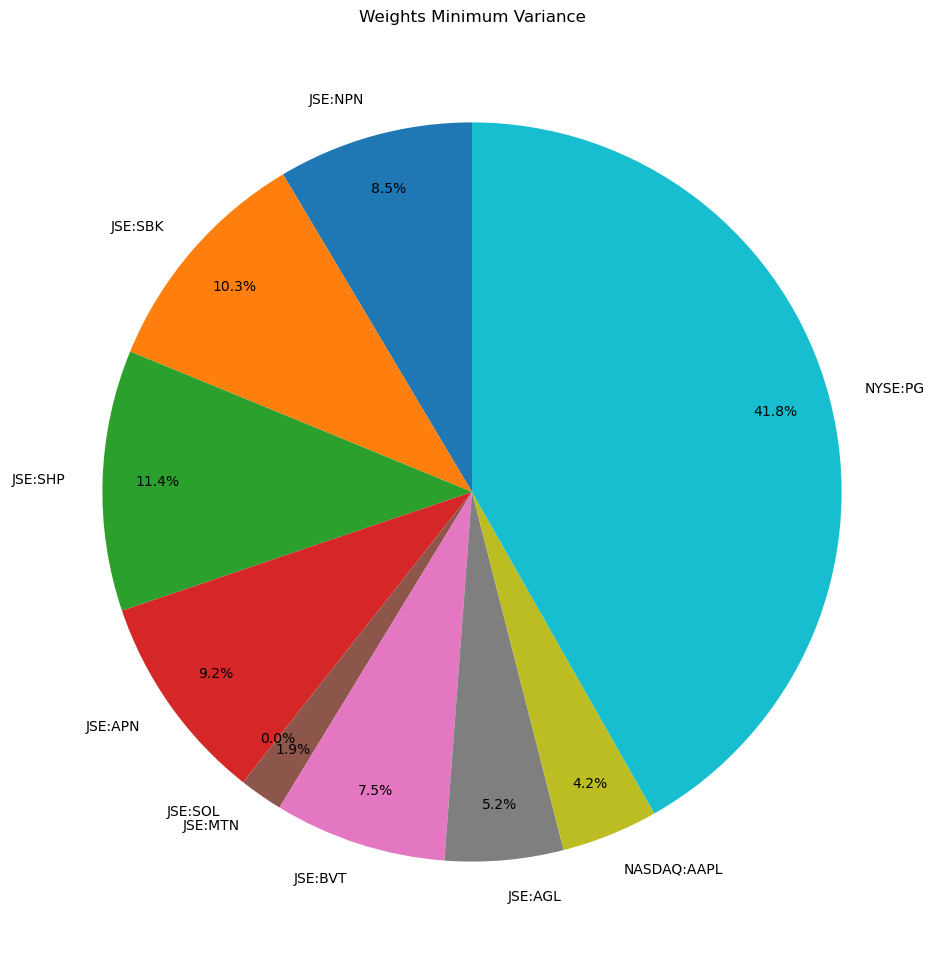

In [115]:
plt.figure(figsize=(12,12))
plt.title('Weights Minimum Variance')
percentage_threshold = 1
plt.pie(portfolio_weights['Minimum Variance'],labels=portfolio_weights.reset_index()['index'],autopct='%1.1f%%',
                                  startangle=90, pctdistance=0.85)
plt.show()
plt.savefig('Weights Minimum Variance.jpg')

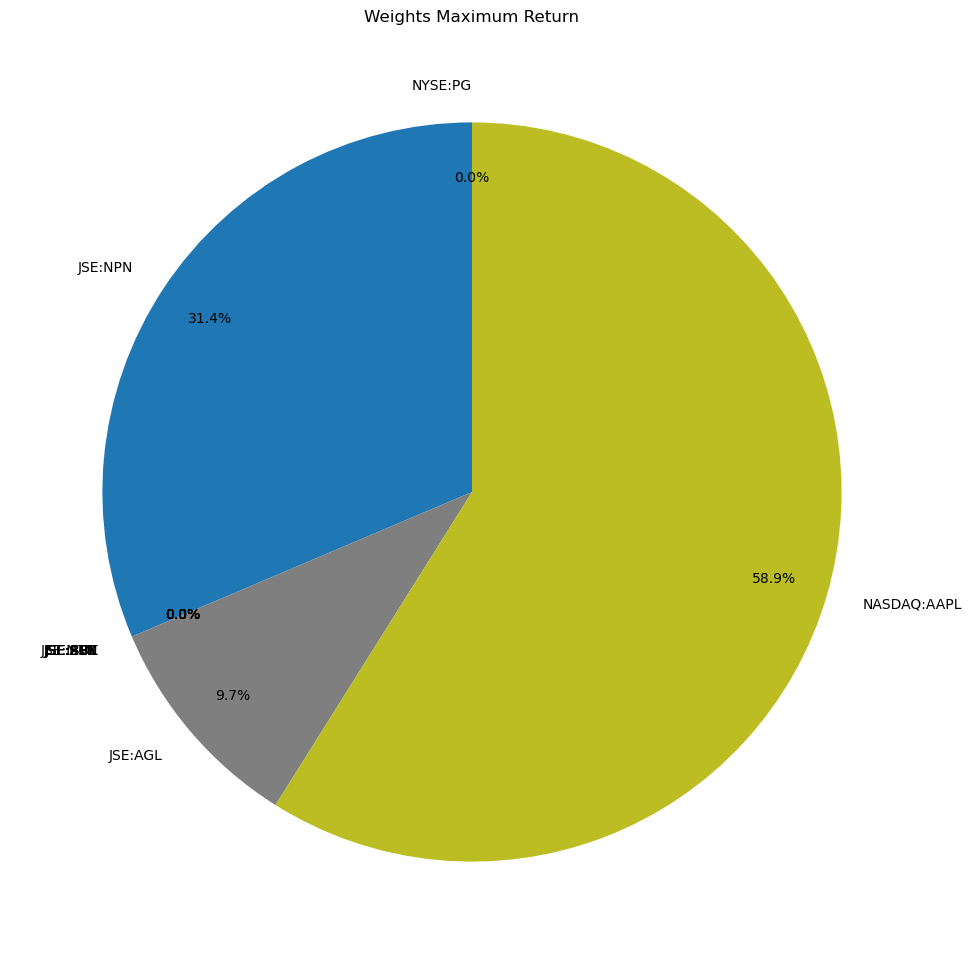

<Figure size 640x480 with 0 Axes>

In [116]:
plt.figure(figsize=(12,12))
plt.title('Weights Maximum Return')
percentage_threshold = 1
plt.pie(portfolio_weights['Maximum Return'],labels=portfolio_weights.reset_index()['index'],autopct='%1.1f%%',
                                  startangle=90, pctdistance=0.85)
plt.show()
plt.savefig('Weights Maximum Return.jpg')

In [46]:
portfolio_weights = {
    "Equally Weighted": np.array([0.1]*10),
    "Maximum Sharpe Ratio": np.array([0.17,0.12,0.06,0,0,0,0,0.06,0.45,0.14]),  # example
    "Minimum Variance": np.array([0.09,0.1,0.11,0.09,0,0.02,0.08,0.05,0.04,0.42]),
    "Maximum Return": np.array([0.31,0,0,0,0,0,0,0.1,0.59,0])
}



In [47]:
portfolio_daily_returns = {}

for name, weights in portfolio_weights.items():
    # Multiply each stock's daily return by its weight and sum across stocks
    portfolio_daily_returns[name] = returns.dot(weights)

In [48]:
max_drawdowns = {}

for name, daily_returns in portfolio_daily_returns.items():
    cumulative_returns = (1 + daily_returns).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    # max_drawdowns[name] = drawdowns.min()
    max_drawdowns[name] = drawdowns
# print("Maximum Drawdowns per Portfolio:")
# print(max_drawdowns)
max_drawdowns

{'Equally Weighted': 2014-01-03 17:00:00         0.0
 2014-01-06 17:00:00   -0.005379
 2014-01-07 17:00:00   -0.000309
 2014-01-08 17:00:00   -0.005545
 2014-01-09 17:00:00   -0.011154
                          ...   
 2025-08-12 17:00:00   -0.012355
 2025-08-13 17:00:00         0.0
 2025-08-14 17:00:00   -0.005636
 2025-08-15 17:00:00   -0.001759
 2025-08-18 17:00:00   -0.011514
 Length: 2802, dtype: object,
 'Maximum Sharpe Ratio': 2014-01-03 17:00:00         0.0
 2014-01-06 17:00:00         0.0
 2014-01-07 17:00:00   -0.001832
 2014-01-08 17:00:00   -0.001355
 2014-01-09 17:00:00   -0.003662
                          ...   
 2025-08-12 17:00:00   -0.027312
 2025-08-13 17:00:00   -0.016025
 2025-08-14 17:00:00   -0.016561
 2025-08-15 17:00:00   -0.016842
 2025-08-18 17:00:00   -0.020597
 Length: 2802, dtype: object,
 'Minimum Variance': 2014-01-03 17:00:00         0.0
 2014-01-06 17:00:00   -0.001192
 2014-01-07 17:00:00         0.0
 2014-01-08 17:00:00   -0.008935
 2014-01-09 17:00:

max_drawdowns.keys()

In [49]:
max_drawdowns.values()

dict_values([2014-01-03 17:00:00         0.0
2014-01-06 17:00:00   -0.005379
2014-01-07 17:00:00   -0.000309
2014-01-08 17:00:00   -0.005545
2014-01-09 17:00:00   -0.011154
                         ...   
2025-08-12 17:00:00   -0.012355
2025-08-13 17:00:00         0.0
2025-08-14 17:00:00   -0.005636
2025-08-15 17:00:00   -0.001759
2025-08-18 17:00:00   -0.011514
Length: 2802, dtype: object, 2014-01-03 17:00:00         0.0
2014-01-06 17:00:00         0.0
2014-01-07 17:00:00   -0.001832
2014-01-08 17:00:00   -0.001355
2014-01-09 17:00:00   -0.003662
                         ...   
2025-08-12 17:00:00   -0.027312
2025-08-13 17:00:00   -0.016025
2025-08-14 17:00:00   -0.016561
2025-08-15 17:00:00   -0.016842
2025-08-18 17:00:00   -0.020597
Length: 2802, dtype: object, 2014-01-03 17:00:00         0.0
2014-01-06 17:00:00   -0.001192
2014-01-07 17:00:00         0.0
2014-01-08 17:00:00   -0.008935
2014-01-09 17:00:00   -0.007525
                         ...   
2025-08-12 17:00:00   -0.075689
2

In [50]:
drawdowns=pd.DataFrame(max_drawdowns)
drawdowns

,Equally Weighted,Maximum Sharpe Ratio,Minimum Variance,Maximum Return
2014-01-03 17:00:00,0.0,0.0,0.0,0.0
2014-01-06 17:00:00,-0.005379,0.0,-0.001192,0.0
2014-01-07 17:00:00,-0.000309,-0.001832,0.0,-0.007127
2014-01-08 17:00:00,-0.005545,-0.001355,-0.008935,-0.000648
2014-01-09 17:00:00,-0.011154,-0.003662,-0.007525,-0.006854
...,...,...,...,...
2025-08-12 17:00:00,-0.012355,-0.027312,-0.075689,-0.013762
2025-08-13 17:00:00,0.0,-0.016025,-0.070124,0.0
2025-08-14 17:00:00,-0.005636,-0.016561,-0.077342,-0.004051
2025-08-15 17:00:00,-0.001759,-0.016842,-0.07437,-0.004855


# Maximum Drawdown
Measurement of greatest peak-to-trough decline in a portfolio's value before a new peak is achieved.  It represents the worst case loss an investor would have experienced had they invested at the absolute top and sold at the absolute bottom during a specific period.

Unlike volatility, which is a statistical measure of dispersion, drawdown is a tangible representation of risk that investors feel acutely.  

High drawdowns, for example 50%, could cause investors to panic and sell at the worst possible time.

Text(0, 0.5, 'Maximum Drawdown')

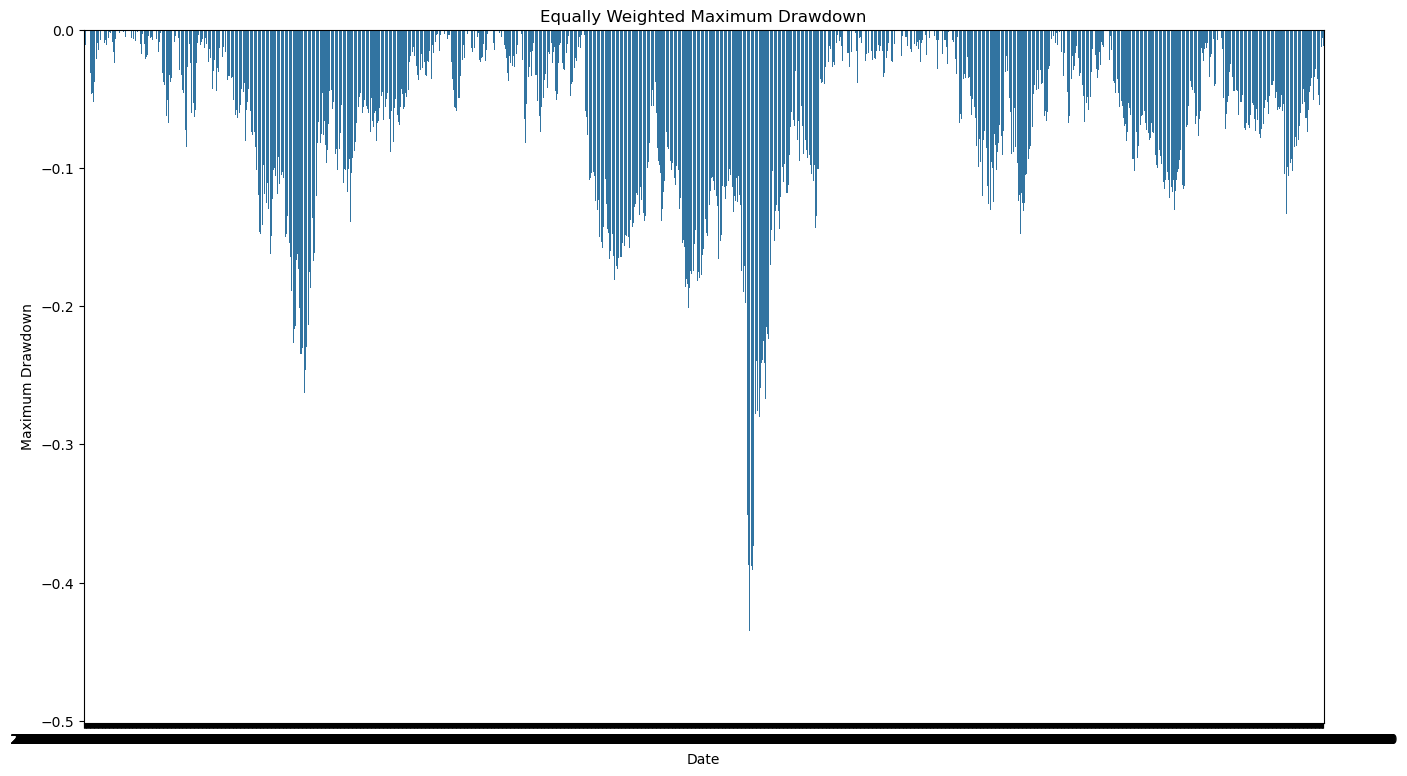

In [51]:
port = 'Equally Weighted'
plt.figure(figsize=(16,9))
plt.title(port + ' Maximum Drawdown')
ax = sns.barplot(x=drawdowns.index, y=drawdowns[port])
ax.set_xlabel("Date")
ax.set_ylabel("Maximum Drawdown")

Text(0, 0.5, 'Maximum Drawdown')

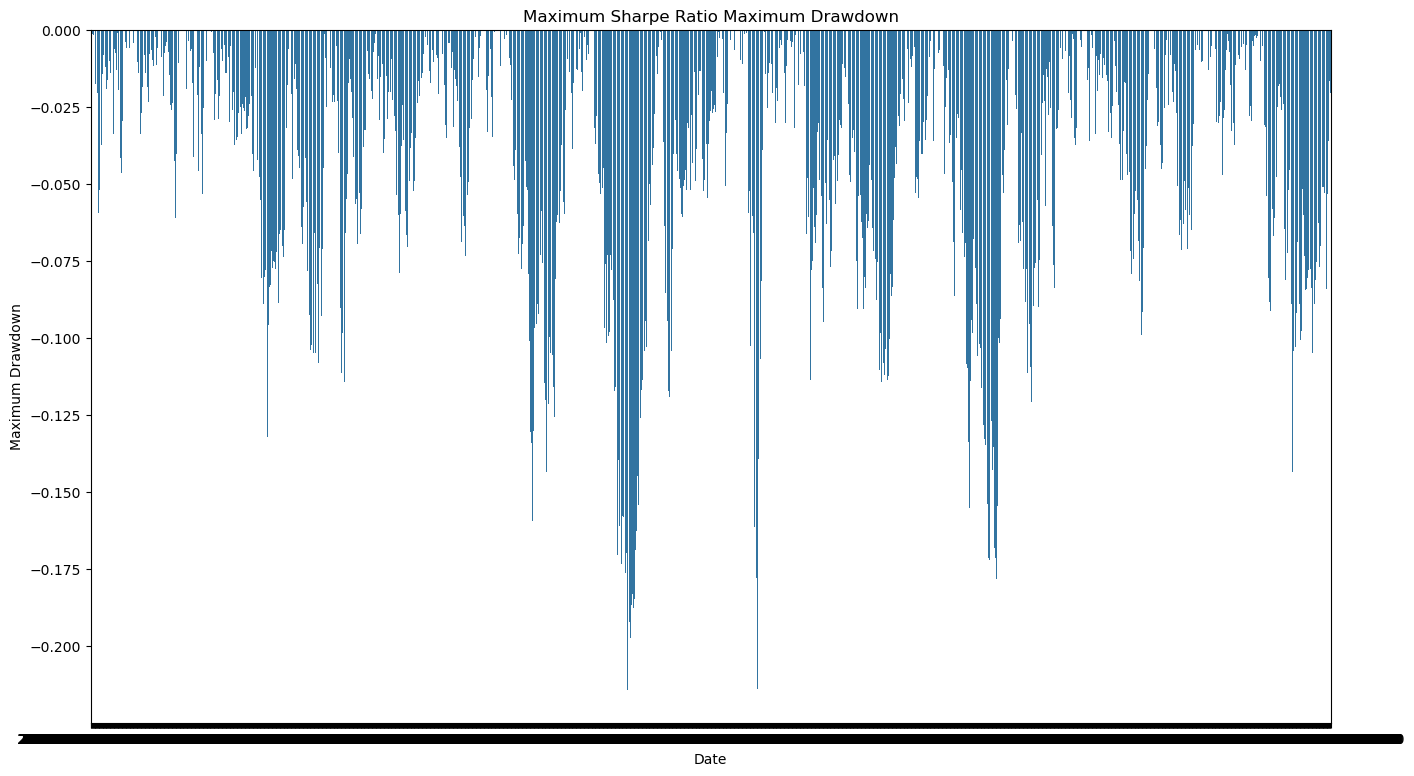

In [52]:
port = 'Maximum Sharpe Ratio'
plt.figure(figsize=(16,9))
plt.title(port + ' Maximum Drawdown')
ax = sns.barplot(x=drawdowns.index, y=drawdowns[port])
ax.set_xlabel("Date")
ax.set_ylabel("Maximum Drawdown")

Text(0, 0.5, 'Maximum Drawdown')

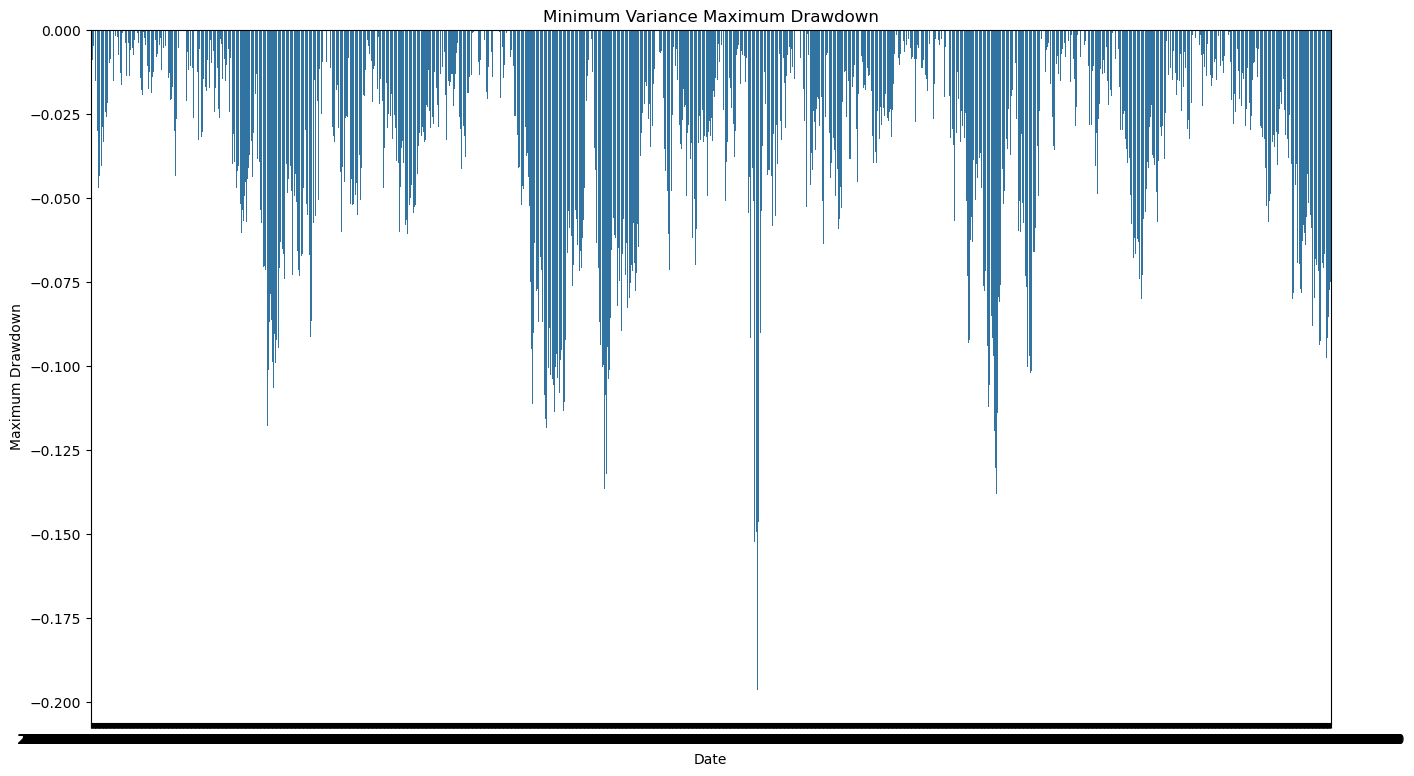

In [53]:
port = 'Minimum Variance'
plt.figure(figsize=(16,9))
plt.title(port + ' Maximum Drawdown')
ax = sns.barplot(x=drawdowns.index, y=drawdowns[port])
ax.set_xlabel("Date")
ax.set_ylabel("Maximum Drawdown")

Text(0, 0.5, 'Maximum Drawdown')

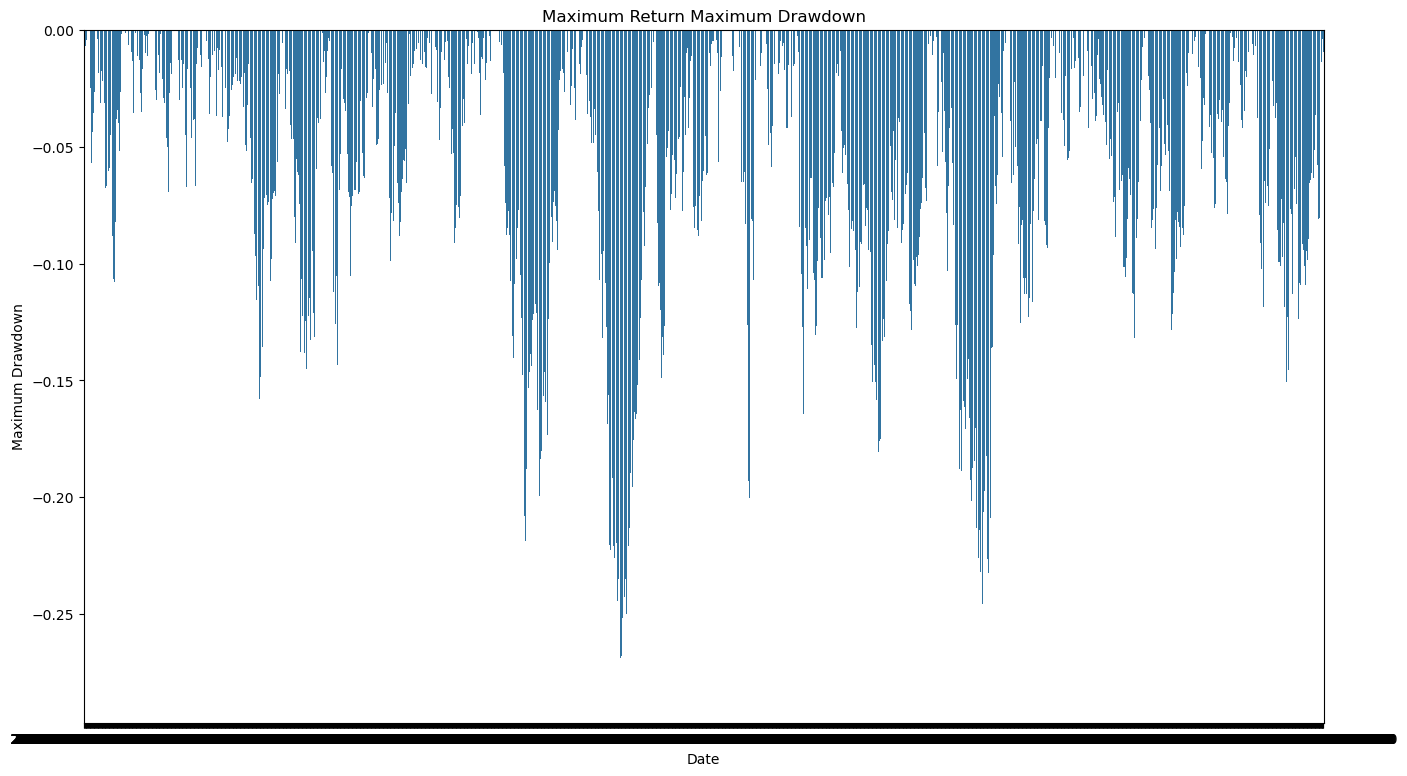

In [54]:
port = 'Maximum Return'
plt.figure(figsize=(16,9))
plt.title(port + ' Maximum Drawdown')
ax = sns.barplot(x=drawdowns.index, y=drawdowns[port])
ax.set_xlabel("Date")
ax.set_ylabel("Maximum Drawdown")

In [55]:
drawdowns.mean()

Equally Weighted        -0.06423
Maximum Sharpe Ratio   -0.041482
Minimum Variance        -0.03262
Maximum Return         -0.059547
dtype: object

In [56]:
recovery_periods = {}

for name, daily_returns in portfolio_daily_returns.items():
    cumulative_returns = (1 + daily_returns).cumprod()
    rolling_max = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - rolling_max) / rolling_max
    
    drawdown_end = drawdowns.idxmin()
    recovery_point = cumulative_returns[drawdown_end:].idxmax()
    recovery_days = (recovery_point - drawdown_end).days  # number of days to recover
    
    recovery_periods[name] = recovery_days

print("Recovery Periods (days) per Portfolio:")
print(recovery_periods)
recovery = pd.DataFrame(recovery_periods,index =np.arange(len(recovery_periods)))
recovery = recovery.loc[recovery.index==0]
recovery.index = ['Portfolio Recovery Period']
recovery

Recovery Periods (days) per Portfolio:
{'Equally Weighted': 1969, 'Maximum Sharpe Ratio': 2185, 'Minimum Variance': 1806, 'Maximum Return': 2414}


,Equally Weighted,Maximum Sharpe Ratio,Minimum Variance,Maximum Return
Portfolio Recovery Period,1969,2185,1806,2414


# Recovery Period 
The time it takes for a portfolio to regain its value and surpass the previous peak after hitting the trough of a drawdown.  It measures the resilience of the portfolio, a quick recovery is much more palatable than a loss that lingers for years.

The recovery time metric adds context to MDD.  A steep drop of 25% that recovers in 6 months is different from a 25% drops that takes 5 years to brean even.

Text(0, 0.5, 'Recovery Periods')

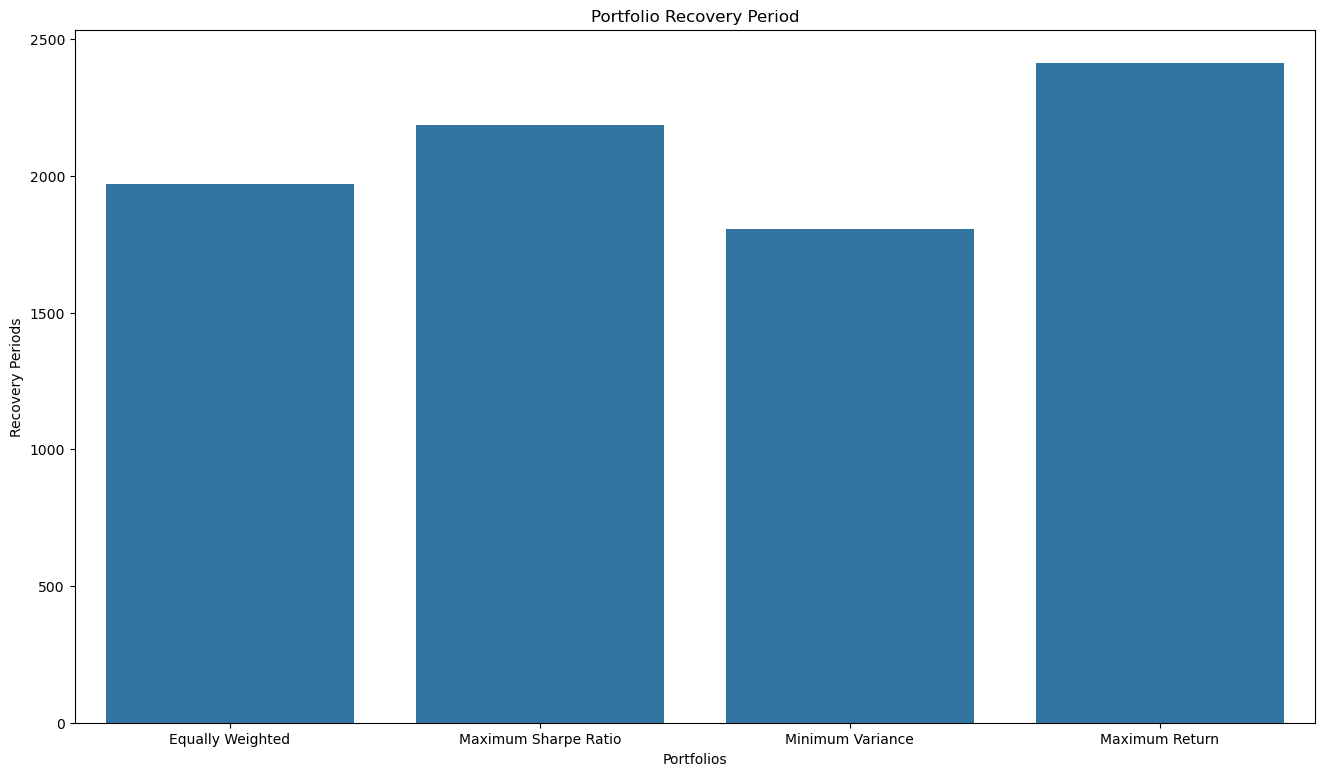

In [57]:
plt.figure(figsize=(16,9))
plt.title('Portfolio Recovery Period')
ax = sns.barplot(x=recovery.columns, y=recovery.iloc[0])
ax.set_xlabel("Portfolios")
ax.set_ylabel("Recovery Periods")

# Sortino Ratio

Modification of the Sharpe Ratio that only considers downside deviations (harmful volatility) rather than total volatility.

Sortino = $\frac{R_p}{\sigma_d}$

Where:
- $\sigma_d$  is the downside deviations

Useful for investors who are concerned with protecting against losses than with the overall volatility of their investment.  A higher Sortino ratio indicates a better risk-adjusted return on the downside.

In [58]:
risk_free_rate = 0  # can adjust if you have a value but for now lets use zero because we dont know it
sortino_ratios = {}

for name, daily_returns in portfolio_daily_returns.items():
    downside_returns = daily_returns[daily_returns < 0]
    
    if len(downside_returns) > 0:
        downside_std = downside_returns.std()
        sortino_ratio = (daily_returns.mean() - risk_free_rate) / downside_std
    else:
        sortino_ratio = np.nan  # no negative returns
    
    sortino_ratios[name] = sortino_ratio

print("Sortino Ratios per Portfolio:")
print(sortino_ratios)

Sortino Ratios per Portfolio:
{'Equally Weighted': np.float64(0.05300742497587133), 'Maximum Sharpe Ratio': np.float64(0.10942318048837414), 'Minimum Variance': np.float64(0.07761452462650949), 'Maximum Return': np.float64(0.10538925949182061)}


Text(0, 0.5, 'Sortino Ratios')

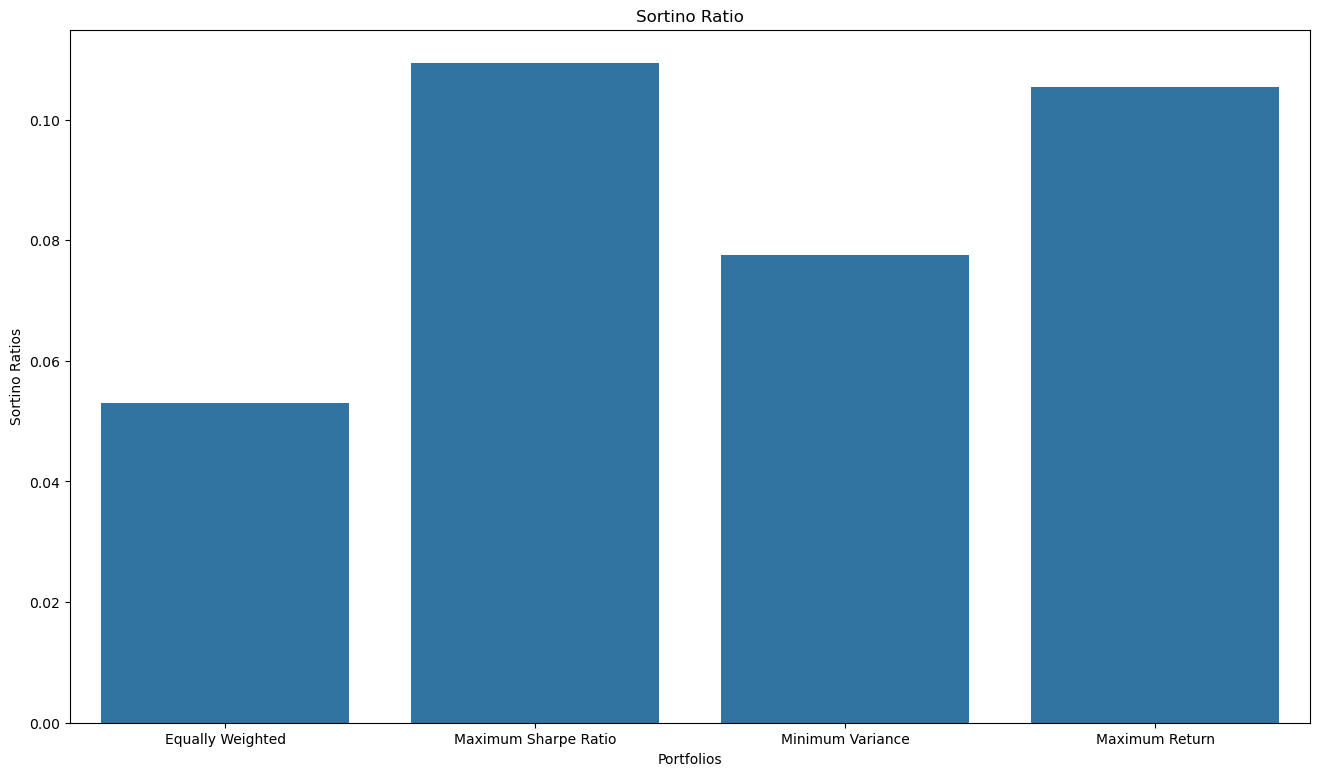

In [59]:
plt.figure(figsize=(16,9))
plt.title('Sortino Ratio')
ax = sns.barplot(x=list(sortino_ratios.keys()), y=list(sortino_ratios.values()))
ax.set_xlabel("Portfolios")
ax.set_ylabel("Sortino Ratios")

In [60]:
results_df = pd.DataFrame({
    "Max Drawdown": max_drawdowns,
    "Recovery Period (days)": recovery_periods,
    "Sortino Ratio": sortino_ratios
})

# Optional: round numbers for readability
results_df = results_df.round({
    "Max Drawdown": 4,
    "Recovery Period (days)": 0,
    "Sortino Ratio": 4
})

print("Portfolio Performance Metrics:")
print(results_df)

Portfolio Performance Metrics:
                                                           Max Drawdown  \
Equally Weighted      2014-01-03 17:00:00         0.0
2014-01-06 17:...   
Maximum Sharpe Ratio  2014-01-03 17:00:00         0.0
2014-01-06 17:...   
Minimum Variance      2014-01-03 17:00:00         0.0
2014-01-06 17:...   
Maximum Return        2014-01-03 17:00:00         0.0
2014-01-06 17:...   

                      Recovery Period (days)  Sortino Ratio  
Equally Weighted                        1969         0.0530  
Maximum Sharpe Ratio                    2185         0.1094  
Minimum Variance                        1806         0.0776  
Maximum Return                          2414         0.1054  


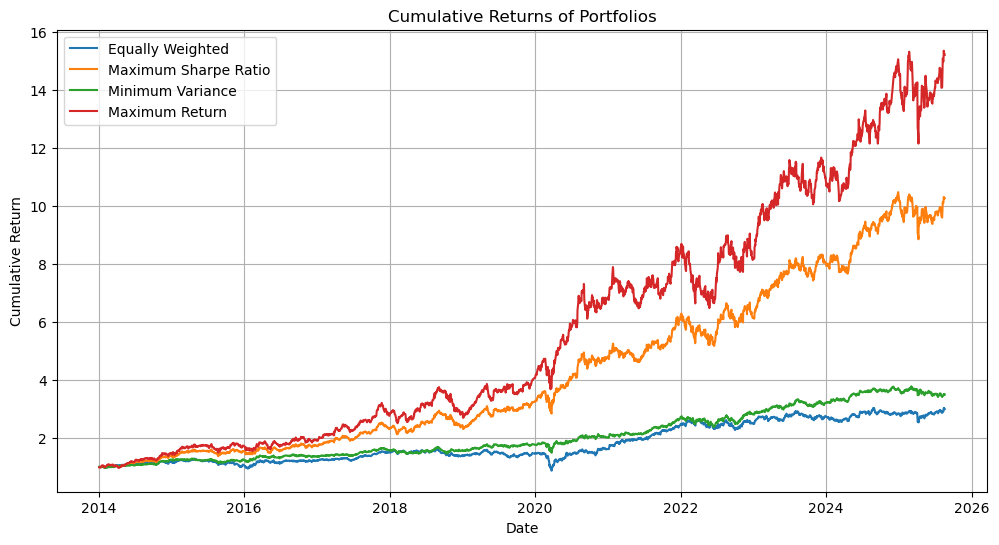

In [61]:
plt.figure(figsize=(12,6))

for name, daily_returns in portfolio_daily_returns.items():
    cumulative_returns = (1 + daily_returns).cumprod()
    plt.plot(cumulative_returns, label=name)

plt.title("Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

# Portfolio Combinations

$\frac{(10+20-1)!}{((10+20-1-10)!10!)}$
=$\frac{(29)!}{(19!10!)}$

$\frac{29\times 28\times 27\times 26\times 25\times 24\times 23\times 22\times 21\times 20}{10\times 9\times 8\times 7\times 6\times 5\times 4\times 3\times 2} = 20030010$

$\frac{20030010}{2}=10015005$

5% increments

In [62]:
from math import comb
from tqdm import tqdm

def generate_stock_weight_combinations(n_stocks=27, step=10, total=100):
    max_units = total // step
    valid_combinations = []

    total_paths = comb(max_units + n_stocks - 1, n_stocks - 1)
    pbar = tqdm(total=total_paths, desc="Generating Combinations", leave=False)

    def backtrack(current, remaining, depth):
        if remaining < 0:
            return  # prune invalid branches
        if depth == n_stocks:
            if remaining == 0:
                valid_combinations.append([w * step for w in current])
            return
        max_i = remaining  # max units we can assign at this depth
        for i in range(max_i + 1):
            pbar.update(1)
            backtrack(current + [i], remaining - i, depth + 1)

    backtrack([], max_units, 0)
    pbar.close()
    return valid_combinations

In [63]:
stocks = 10
weights = generate_stock_weight_combinations(n_stocks=stocks, step=5, total = 100)


In [68]:
len(weights)

10015005

In [64]:
from tqdm import tqdm

total_iterations = len(weights) * len(weights[0])
with tqdm(total=total_iterations, desc="Normalizing Weights",leave=False) as pbar:
    for i in range(len(weights)):
        for j in range(len(weights[0])):
            weights[i][j] = weights[i][j] / 100
            pbar.update(1)

In [65]:
returns_plot = []
risk_plot = []
with tqdm(total=len(weights), desc="Plotting EF",leave=False) as pbar:
    for i in range(len(weights)):
        w = np.array(weights[i])
        returns_plot.append(w@mean_returns[:stocks])
        risk_plot.append(np.sqrt((w@cov_matrix.iloc[:stocks,:stocks])@w.T))
        pbar.update(1)

In [66]:
sharpe_ratios = []
for i in range(len(returns_plot)):
    sharpe_ratios.append(returns_plot[i]/risk_plot[i])
    
equal_weights = np.ones(stocks) / stocks
equal_return = np.dot(equal_weights, mean_returns[:stocks])
equal_risk = np.sqrt(np.dot(equal_weights.T, np.dot(cov_matrix.iloc[:stocks,:stocks], equal_weights)))

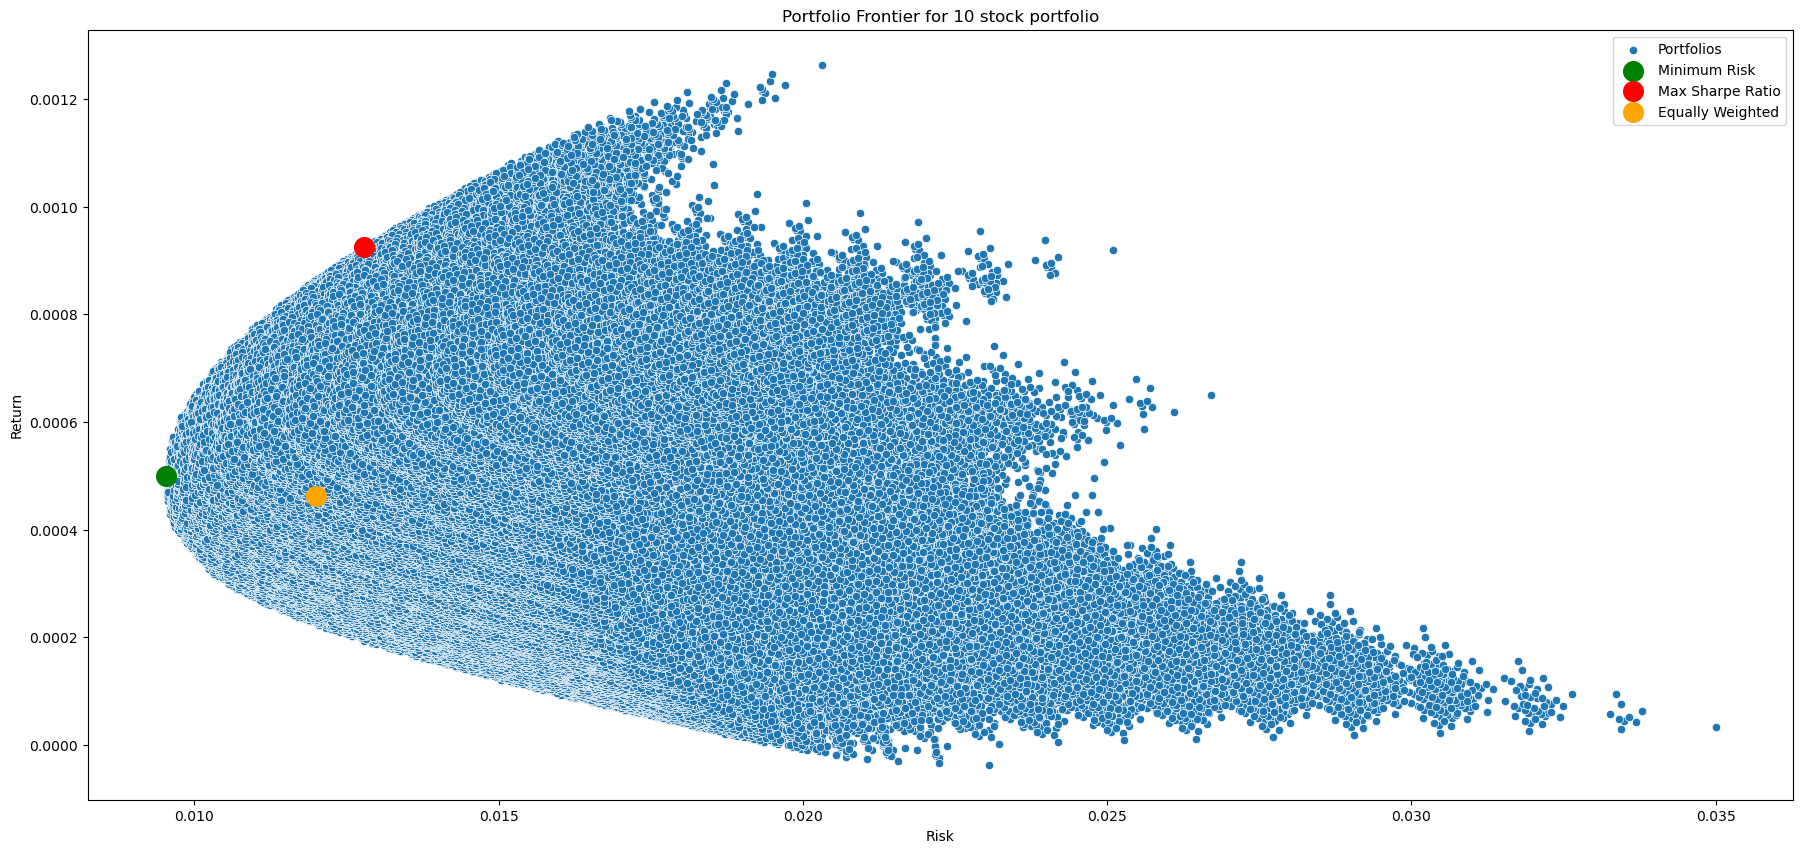

In [67]:
plt.figure(figsize=(22,10))
plt.title('Portfolio Frontier for ' + str(stocks) + ' stock portfolio')
min_risk_idx = np.argmin(risk_plot)

max_sharpe_idx = np.argmax(sharpe_ratios)

ax = sns.scatterplot(x=risk_plot,y=returns_plot, label='Portfolios')
ax.set_xlabel('Risk')
ax.set_ylabel('Return')

plt.scatter(risk_plot[min_risk_idx], returns_plot[min_risk_idx], color='green', s=200, label='Minimum Risk')
plt.scatter(risk_plot[max_sharpe_idx], returns_plot[max_sharpe_idx], color='red', s=200, label='Max Sharpe Ratio')
plt.scatter(equal_risk, equal_return, color='orange', s=200, label='Equally Weighted')
plt.legend()

